In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np

# Python for Data Analysis

One of the biggest selling points of **Python** is how easy it is to work with data. 

The **Python** ecosystem includes many useful packages to quickly, easily and powerfully work with various forms of data. 

**References:**
1. http://pandas.pydata.org/pandas-docs/stable/dsintro.html
1. http://quant-econ.net/py/pandas.html
1. http://pandas.pydata.org/pandas-docs/stable/10min.html
1. http://pandas.pydata.org/pandas-docs/stable/tutorials.html

**For Interested Students** 

An Excellent Resource is the book "Python for Data Analysis", by Wes McKinney

## Series and DataFrame Objects

Many examples are taken from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

The two **primary** data objects in Pandas are:

1. Series
2. DataFrames

DataFrames can be thought of as a collection of Series. Selecting a column in a DataFrame will return a Series Object.

The **key** thing to keep in mind:

> data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index which can include Index or MultiIndex objects

```
s = pd.Series(data, index=index)
```

data can take many different forms (i.e. dict, ndarray, lists, scalar etc)

#### From Numpy Arrays

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s

a   -0.714222
b   -0.597318
c    0.878852
d    0.312614
e   -0.425330
dtype: float64

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
#-No Index Specified then will default to a numeric index-#
s = pd.Series(np.random.randn(5))

In [7]:
s

0   -0.437302
1   -1.387520
2    0.791516
3   -0.034739
4    0.237230
dtype: float64

#### From Dictionaries

In [8]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0
b    1
c    2
dtype: float64

In [9]:
#-Data Alignment is Intrinsic!-#
pd.Series(d, index=['b', 'c', 'd', 'a'])

b     1
c     2
d   NaN
a     0
dtype: float64

#### Series Objects are Similar to Array Behaviour

In [10]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [11]:
s

a    0.776869
b   -1.238305
c    0.217301
d   -1.417607
e    0.832182
dtype: float64

In [12]:
s[0]

0.77686872793355644

In [13]:
s[1:3]

b   -1.238305
c    0.217301
dtype: float64

In [14]:
s[s > s.median()]

a    0.776869
e    0.832182
dtype: float64

In [15]:
s[[3,2,1]]

d   -1.417607
c    0.217301
b   -1.238305
dtype: float64

**Typically** they are very flexible

In [16]:
np.sum(s)

-0.8295598890429762

In [17]:
s.sum()

-0.8295598890429762

#### Indexing via the index can be done through the `ix` operator (more important for DataFrames)

In [18]:
s.ix[['d','e']]

d   -1.417607
e    0.832182
dtype: float64

**but** becuase they are Series Objects we can also use them like dictionaries to get access to the data. **Don't** confuse this with DataFrame Objects

In [19]:
s[['d','e']]

d   -1.417607
e    0.832182
dtype: float64

#### Operations on Series Objects

In [20]:
s + s

a    1.553737
b   -2.476609
c    0.434602
d   -2.835214
e    1.664363
dtype: float64

In [21]:
s * 2

a    1.553737
b   -2.476609
c    0.434602
d   -2.835214
e    1.664363
dtype: float64

In [22]:
np.sqrt(s)

a    0.881402
b         NaN
c    0.466156
d         NaN
e    0.912240
dtype: float64

A **key** difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [23]:
s[2:]                  #No A,B

c    0.217301
d   -1.417607
e    0.832182
dtype: float64

In [24]:
s[:-2]                  #No D,E

a    0.776869
b   -1.238305
c    0.217301
dtype: float64

In [25]:
s[2:] + s[:-2]         #Intrinsic Alignment, Union of Index Values

a         NaN
b         NaN
c    0.434602
d         NaN
e         NaN
dtype: float64

#### Useful Built In Methods

In [26]:
s.describe()

count    5.000000
mean    -0.165912
std      1.089569
min     -1.417607
25%     -1.238305
50%      0.217301
75%      0.776869
max      0.832182
dtype: float64

-----------------------------------------------------------------------

### DataFrame

Reference: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. **It is generally the most commonly used pandas object**. Like Series, DataFrame accepts many different kinds of input:

1. Dict of 1D ndarrays, lists, dicts, or Series
1. 2-D numpy.ndarray
1. Structured or record ndarray
1. A Series
1. Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

**Note:** DataFrames have become a standard in the Python ecosystem and can be used with a lot of packages such as **statsmodels**, **scikit-learn** ...

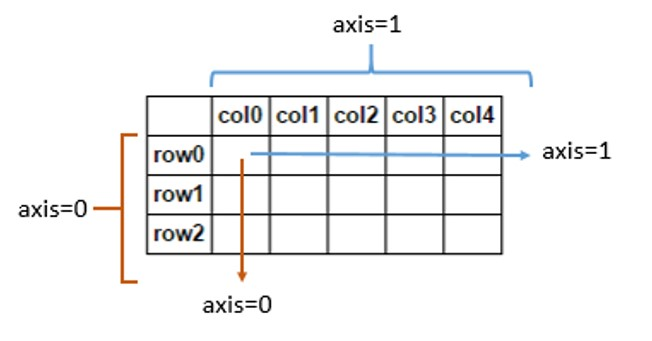

In [27]:
Image(filename='dataframe.jpg')

In [28]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [29]:
df          #-Automatic Alignment of Series based on Index-#

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [30]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [31]:
df.columns

Index(['one', 'two'], dtype='object')

#### Accessing Columns

In [32]:
df['one']

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

In [33]:
type(df['one'])

pandas.core.series.Series

#### Accessing Rows

In [34]:
df.ix['b']

one    2
two    2
Name: b, dtype: float64

In [35]:
type(df.ix['b'])

pandas.core.series.Series

#### Adding Rows

In [36]:
df['three'] = df['one'] + df['two']

In [37]:
df

,one,two,three
a,1,1,2
b,2,2,4
c,3,3,6
d,NaN,4,NaN


#### Selecting Multiple Columns

In [38]:
df[['one','three']]

,one,three
a,1,2
b,2,4
c,3,6
d,NaN,NaN


#### Selecting Multiple Rows

In [39]:
df.ix[['b','c']]

,one,two,three
b,2,2,4
c,3,3,6


#### Inserting Scalars

In [40]:
df['four'] = "What"   #Fill the Column

In [41]:
df

,one,two,three,four
a,1,1,2,What
b,2,2,4,What
c,3,3,6,What
d,NaN,4,NaN,What


#### Deleting a Column

In [42]:
del df['four']

In [43]:
df

,one,two,three
a,1,1,2
b,2,2,4
c,3,3,6
d,NaN,4,NaN


#### Transposing

In [44]:
df.T

,a,b,c,d
one,1,2,3,NaN
two,1,2,3,4
three,2,4,6,NaN


In [45]:
df.transpose()

,a,b,c,d
one,1,2,3,NaN
two,1,2,3,4
three,2,4,6,NaN


In [46]:
df              #Note: The underlying object hasn't changed due to no assignment

,one,two,three
a,1,1,2
b,2,2,4
c,3,3,6
d,NaN,4,NaN


## Index Objects and Reshaping

In [47]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [48]:
df

,A,B,C,D,E
0,one,A,foo,-1.140514,-0.244258
1,one,B,foo,-0.964568,-0.900990
2,two,C,foo,0.203750,0.496570
3,three,A,bar,-0.226793,-0.219069
4,one,B,bar,-0.169267,-0.875755
5,one,C,bar,1.330430,1.724682
6,two,A,foo,0.659564,0.702119
7,three,B,foo,-0.501454,1.265611
8,one,C,foo,-0.351229,-0.688964
9,one,A,bar,-0.056251,-0.327184


In [49]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.056251 -1.140514
      B -0.169267 -0.964568
      C  1.330430 -0.351229
three A -0.226793       NaN
      B       NaN -0.501454
      C  0.086051       NaN
two   A       NaN  0.659564
      B  0.778059       NaN
      C       NaN  0.203750

**Using MultiIndex** to reorganize the information in a DataFrame

In [50]:
dfi = df.set_index(['A','B','C'])

In [51]:
dfi.unstack(level='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.056251 -1.140514 -0.327184 -0.244258
      B -0.169267 -0.964568 -0.875755 -0.900990
      C  1.330430 -0.351229  1.724682 -0.688964
three A -0.226793       NaN -0.219069       NaN
      B       NaN -0.501454       NaN  1.265611
      C  0.086051       NaN  0.991894       NaN
two   A       NaN  0.659564       NaN  0.702119
      B  0.778059       NaN -0.919110       NaN
      C       NaN  0.203750       NaN  0.496570

In [52]:
dfi['D'].unstack(level='C')

C             bar       foo
A     B                    
one   A -0.056251 -1.140514
      B -0.169267 -0.964568
      C  1.330430 -0.351229
three A -0.226793       NaN
      B       NaN -0.501454
      C  0.086051       NaN
two   A       NaN  0.659564
      B  0.778059       NaN
      C       NaN  0.203750

#### Comparison of DataFrame Objects

In [53]:
#-Compare-#
df1 = dfi['D'].unstack(level='C')
df2 = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

In [54]:
df1.equals(df2)

True

## Sorting

In [55]:
s = pd.Series(range(4), index=['d','a','b','c'])

In [56]:
s

d    0
a    1
b    2
c    3
dtype: int64

In [57]:
s.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [58]:
df = pd.DataFrame(np.arange(8).reshape((2,4)), index=['three','one'], columns=['d','a','b','c'])

In [59]:
df

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [60]:
df.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [61]:
df.sort_index(axis=1)        #Columns

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [62]:
df.sort_values(by='a')

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


#### Chain Operations Together

In [63]:
df.sort_index(axis=1).sort_values(by='a', ascending=False)

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


**Note:** Using a MultiIndex you can also sort by levels in the index

### Ranking

In [64]:
df = df.T

In [65]:
df

,three,one
d,0,4
a,1,5
b,2,6
c,3,7


In [66]:
df.rank()

,three,one
d,1,1
a,2,2
b,3,3
c,4,4


-----------------------------------------------------------------------

## Split-Apply-Combine

DataFrames also support more advanced operations such as **groupby**  which can be very powerful when aggregating data based on groups and performing some operations over them

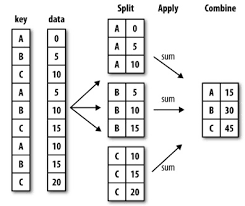

In [67]:
Image(filename='split-apply-combine.png')

In [68]:
key = ['A','B','C','A','B','C','A','B','C']
data = [0,5,10,5,10,15,10,15,20]
df = pd.DataFrame(data, index=key, columns=['data'])

In [69]:
#-Groupby Index Level-#
df.groupby(level=0).sum()

,data
A,15
B,30
C,45


In [70]:
df = df.reset_index()
df.columns=["key","data"]
df.groupby(by=["key"]).sum()

,data
key,
A,15
B,30
C,45


## Working with Special Types of Data

**Pandas** has a support for different types of data such as:

1. Time Series
1. Categoricals (very recently)

Reference: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [71]:
rng = pd.date_range('1/1/2012', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [72]:
ts.head()

2012-01-01 00:00:00    265
2012-01-01 00:00:01    455
2012-01-01 00:00:02    261
2012-01-01 00:00:03    143
2012-01-01 00:00:04    136
Freq: S, dtype: int64

In [73]:
ts.tail()

2012-01-01 00:03:15    260
2012-01-01 00:03:16     93
2012-01-01 00:03:17     29
2012-01-01 00:03:18    177
2012-01-01 00:03:19    217
Freq: S, dtype: int64

#### Resampling the Time Series

In [74]:
ts.resample('1Min')

2012-01-01 00:00:00    279.416667
2012-01-01 00:01:00    243.116667
2012-01-01 00:02:00    228.150000
2012-01-01 00:03:00    174.100000
Freq: T, dtype: float64

In [75]:
ts.resample('1Min', how='mean')

2012-01-01 00:00:00    279.416667
2012-01-01 00:01:00    243.116667
2012-01-01 00:02:00    228.150000
2012-01-01 00:03:00    174.100000
Freq: T, dtype: float64

In [76]:
ts.resample('1Min', how='sum')

2012-01-01 00:00:00    16765
2012-01-01 00:01:00    14587
2012-01-01 00:02:00    13689
2012-01-01 00:03:00     3482
Freq: T, dtype: int64

-----------------------------------------------------------------------

## Example: Working with the World Development Indicators

1. Using Excel Files


In [77]:
%matplotlib inline
from pandas.io.excel import ExcelFile
import matplotlib.pyplot as plt
fl = "data/ae0545d9-7b57-4c37-9db1-91859e7bd5c3_v2.xls"
gov_debt_xls = ExcelFile(fl)
govt_debt = gov_debt_xls.parse('Data', index_col=1, na_values=['NA'], skiprows=3)

In [78]:
govt_debt

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,Andorra,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,Angola,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,Albania,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARB,Arab World,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARE,United Arab Emirates,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.907780,NaN,NaN
ARG,Argentina,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARM,Armenia,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#-<< Run Through Steps Below Here >>-#

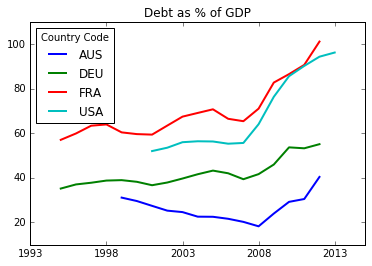

In [80]:
# == Take desired values and plot == #
data = govt_debt.transpose()
data = data[['AUS', 'DEU', 'FRA', 'USA']]  #Select Countries
data = data[36:]  #Select Years
data.plot(lw=2, title='Debt as % of GDP')
plt.show()

========================================================================

## Medium Sized DataSets (International Trade)

Some problems start to become large and may demand working with more sophisticated tools. Very large problems require data management tools such as SQL, NoSQL, and Graph based Datasets; but a large number of problems are in between: not small enough for Excel and manual manipulation, but annoyingly small to have to learn database management. **Pandas** sits in this space nicely as a spreadsheet type abstraction that is scalable.

Let's consider Product Level International Exports data for the world economy.

**Files Required:**
Go to http://atlas.media.mit.edu/en/resources/data/ and download
1. SITC4 Rev. 2 (1962 to 2013) - "Product Trade between Origin and Destination Country by Year (bilateral)"
2. "Country Names"
3. "SITC Revision 2 Product Names"


In [81]:
export = "data/year_origin_sitc_rev2.tsv"
cname = "data/country_names.tsv"
pname = "data/products_sitc_rev2.tsv"

In [82]:
export = pd.read_csv(export, sep='\t')
cname = pd.read_csv(cname, sep='\t')
pname = pd.read_csv(pname, sep='\t')

#### Let's take look at the data

In [83]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000,2000,0.013854,NaN
1,1962,afg,250,66000,0,0.384611,NaN
2,1962,afg,540,74000,0,2.358660,NaN
3,1962,afg,545,17000,0,0.074049,NaN
4,1962,afg,548,33000,0,0.691940,NaN


In [84]:
cname.head()

,id,id_3char,name
0,afago,ago,Angola
1,afbdi,bdi,Burundi
2,afben,ben,Benin
3,afbfa,bfa,Burkina Faso
4,afbwa,bwa,Botswana


In [85]:
pname.head()

,id,sitc,name
0,105722,5722,Initiating Devices
1,105838,5838,Polymerization Ion Exchangers
2,106250,6250,"Rubber tires, tire cases, inner and flaps, for..."
3,106251,6251,Car Tires
4,106280,6280,Other articles of rubber


#### Let's Focus on Export Data

In [86]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000,2000,0.013854,NaN
1,1962,afg,250,66000,0,0.384611,NaN
2,1962,afg,540,74000,0,2.358660,NaN
3,1962,afg,545,17000,0,0.074049,NaN
4,1962,afg,548,33000,0,0.691940,NaN


In [87]:
export.shape

(5002928, 7)

In [88]:
export.describe()

,year,sitc_rev2,export_val,import_val,export_rca,import_rca
count,5002928.000000,5002928.000000,4.918819e+06,4.999516e+06,4918819.000000,3950609.000000
mean,1993.513410,5548.390583,4.548178e+07,4.458144e+07,2.593615,1.616125
std,13.116049,2673.359200,7.879395e+08,7.787933e+08,87.795506,21.995977
min,1962.000000,10.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1985.000000,2929.000000,0.000000e+00,4.456700e+04,0.000000,0.130933
50%,1995.000000,6553.000000,3.672900e+04,6.300000e+05,0.035696,0.522320
75%,2004.000000,7435.000000,1.670977e+06,6.331729e+06,0.443627,1.307450
max,2013.000000,9710.000000,3.052372e+11,3.366875e+11,81664.200000,21594.500000


**Warning:** Be careful with how the data is represented when it is imported. SITC revision 2 codes are typically 4 digits long, that incorporate leading zeros. When working with data always take time to inspect your data

In [89]:
export = "data/year_origin_sitc_rev2.tsv"
export = pd.read_csv(export, sep='\t', converters={'sitc_rev2':str})

pname = "data/products_sitc_rev2.tsv"
pname = pd.read_csv(pname, sep='\t', converters={'sitc':str})

In [90]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,0230,4000,2000,0.013854,NaN
1,1962,afg,0250,66000,0,0.384611,NaN
2,1962,afg,0540,74000,0,2.358660,NaN
3,1962,afg,0545,17000,0,0.074049,NaN
4,1962,afg,0548,33000,0,0.691940,NaN


In [91]:
export.describe()

,year,export_val,import_val,export_rca,import_rca
count,5002928.000000,4.918819e+06,4.999516e+06,4918819.000000,3950609.000000
mean,1993.513410,4.548178e+07,4.458144e+07,2.593615,1.616125
std,13.116049,7.879395e+08,7.787933e+08,87.795506,21.995977
min,1962.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1985.000000,0.000000e+00,4.456700e+04,0.000000,0.130933
50%,1995.000000,3.672900e+04,6.300000e+05,0.035696,0.522320
75%,2004.000000,1.670977e+06,6.331729e+06,0.443627,1.307450
max,2013.000000,3.052372e+11,3.366875e+11,81664.200000,21594.500000


In [92]:
export.dtypes

year            int64
origin         object
sitc_rev2      object
export_val    float64
import_val    float64
export_rca    float64
import_rca    float64
dtype: object

### Compute RCA Values

Let's use Balassa Revealed Comparative Advantage

$$
RCA_{cpt} =\frac{E_{cpt}}{E_{ct}} / \frac{E_{pt}}{E_t}
$$


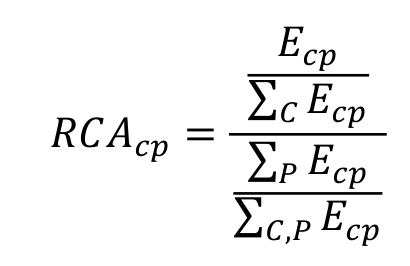

In [93]:
Image("./rca-balassa.png")

In [94]:
data = export[["year","origin","sitc_rev2","export_val","export_rca"]]

In [95]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca
0,1962,afg,0230,4000,0.013854
1,1962,afg,0250,66000,0.384611
2,1962,afg,0540,74000,2.358660
3,1962,afg,0545,17000,0.074049
4,1962,afg,0548,33000,0.691940


In [96]:
cntry_total = data.groupby(by=["year","origin"]).sum()[["export_val"]]
cntry_total.columns=['ctotal']
product_total = data.groupby(by=["year","sitc_rev2"]).sum()[["export_val"]]
product_total.columns=['ptotal']
world_total = data.groupby(by=["year"]).sum()[["export_val"]]
world_total.columns=['wtotal']

In [97]:
cntry_total.head()

ctotal
year origin            
1962 afg       86135000
     ago      119458000
     alb        2688000
     are           2000
     arg     1430519000

In [98]:
product_total.head()

ptotal
year sitc_rev2           
1962 0010         1776000
     0011       478649000
     0012        44891000
     0013        67317000
     0014        25580000

In [99]:
world_total.head()

,wtotal
year,
1962,1.437881e+11
1963,1.588631e+11
1964,1.796778e+11
1965,1.962422e+11
1966,2.167287e+11


In [100]:
data = data.merge(cntry_total.reset_index(), on=["year","origin"])

In [101]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal
0,1962,afg,0230,4000,0.013854,86135000
1,1962,afg,0250,66000,0.384611,86135000
2,1962,afg,0540,74000,2.358660,86135000
3,1962,afg,0545,17000,0.074049,86135000
4,1962,afg,0548,33000,0.691940,86135000


In [102]:
#-Check what these Operations have Done-#
data[data.origin == 'afg'][["year","origin","ctotal"]].drop_duplicates().head()

,year,origin,ctotal
0,1962,afg,86135000
36223,1963,afg,105038000
74727,1964,afg,84797000
113808,1965,afg,91223000
154163,1966,afg,114601000


In [103]:
data = data.merge(product_total.reset_index(), on=["year","sitc_rev2"])
data = data.merge(world_total.reset_index(), on=["year"])

In [104]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal
0,1962,afg,0230,4000,0.013854,86135000,438674000,1.437881e+11
1,1962,arg,0230,7162000,1.493650,1430519000,438674000,1.437881e+11
2,1962,aus,0230,66077000,9.519820,2070759000,438674000,1.437881e+11
3,1962,aut,0230,3071000,0.953014,961366000,438674000,1.437881e+11
4,1962,bel,0230,4802000,0.348457,4111319000,438674000,1.437881e+11


In [105]:
data["computed_rca"] = (data["export_val"]/data["ctotal"])/(data["ptotal"]/data["wtotal"])

In [106]:
data["diff"] = data["export_rca"] - data["computed_rca"]

In [107]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal,computed_rca,diff
0,1962,afg,0230,4000,0.013854,86135000,438674000,1.437881e+11,0.015222,-0.001367
1,1962,arg,0230,7162000,1.493650,1430519000,438674000,1.437881e+11,1.641050,-0.147400
2,1962,aus,0230,66077000,9.519820,2070759000,438674000,1.437881e+11,10.459280,-0.939460
3,1962,aut,0230,3071000,0.953014,961366000,438674000,1.437881e+11,1.047061,-0.094047
4,1962,bel,0230,4802000,0.348457,4111319000,438674000,1.437881e+11,0.382844,-0.034387


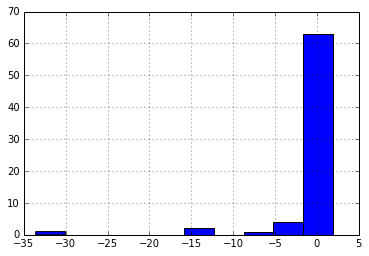

In [108]:
#-Let's check How different the Computed Numbers are for Afghanistan-#
%matplotlib inline
data[(data.year==1962) & (data.origin=="afg")]['diff'].hist()

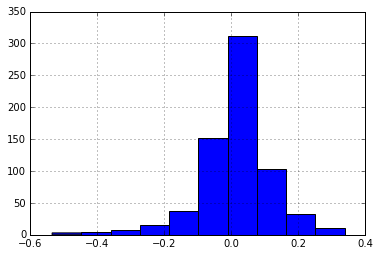

In [109]:
#-USA-#
data[(data.year==1962) & (data.origin=="usa")]['diff'].hist()

=========================================================================

## Web Data

Let's consider a practical and everyday type of problem. Say we want to collect some data from a web site that has some embedded tables. Let's make use of the PyPI package index and check out the search results for `economics`.

1. https://pypi.python.org/pypi
2. Search `economics`
3. Check the structure of the web link (https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search)

In [116]:
#-Web Data and Web Scraping-#

import pandas as pd
import requests

url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)

In [111]:
page.      #-Explore the Object, This is a Representation of a Web Page-#

SyntaxError: invalid syntax (<ipython-input-111-f31342024ecf>, line 1)

In [117]:
page.text

'<?xml version="1.0" encoding="utf-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n\n  <html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en">\n    <head>\n      \n      <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n      <title>Index of Packages Matching \'economics\' : Python Package Index</title>\n      <meta content="python programming language object oriented web free source package index download software"/>\n      <meta content="The Python Package Index is a repository of software for the Python programming language."/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 latest updates" href="https://pypi.python.org/pypi?:action=rss"/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 newest packages" href="https://pypi.python.org/pypi?:action=packages_rss"/>\n       <link rel="stylesheet" media="screen" href="/static/styl

In [118]:
table = pd.read_html(page.text)

In [119]:
table[0]

,0,1,2
0,Package,Weight*,Description
1,economics 0.1.2,11,Functions and data manipulation for economics ...
2,trytond_health_socioeconomics 3.0.0,6,GNU Health Socioeconomics Module
3,trytond_health_socioeconomics 2.8.1,6,GNU Health Socioeconomics Module
4,econometrics 0.1.,4,Python economics library
5,pymaclab 0.95.9,4,The Python Macroeconomics Laboratory
6,dismalpy 0.2.3,2,DismalPy: a collection of resources for quanti...
7,dismalpy 0.2.2,2,DismalPy: a collection of resources for quanti...
8,econ 0.4,2,"An open set of economics related tools, data a..."
9,FRB 1.1.2,2,Federal Reserve Economic Data (FRED)


In [120]:
#-Use Infered Header Information-#
table = pd.read_html(page.text, header=0)[0]

In [121]:
#-Nicely Formatted Table-#
table

,Package,Weight*,Description
0,economics 0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics 3.0.0,6,GNU Health Socioeconomics Module
2,trytond_health_socioeconomics 2.8.1,6,GNU Health Socioeconomics Module
3,econometrics 0.1.,4,Python economics library
4,pymaclab 0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy 0.2.3,2,DismalPy: a collection of resources for quanti...
6,dismalpy 0.2.2,2,DismalPy: a collection of resources for quanti...
7,econ 0.4,2,"An open set of economics related tools, data a..."
8,FRB 1.1.2,2,Federal Reserve Economic Data (FRED)
9,FRB 1.1.1,2,Federal Reserve Economic Data (FRED)


In [122]:
#-Final Code-#
url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)
table = pd.read_html(page.text, header=0)[0]

In [123]:
table

,Package,Weight*,Description
0,economics 0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics 3.0.0,6,GNU Health Socioeconomics Module
2,trytond_health_socioeconomics 2.8.1,6,GNU Health Socioeconomics Module
3,econometrics 0.1.,4,Python economics library
4,pymaclab 0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy 0.2.3,2,DismalPy: a collection of resources for quanti...
6,dismalpy 0.2.2,2,DismalPy: a collection of resources for quanti...
7,econ 0.4,2,"An open set of economics related tools, data a..."
8,FRB 1.1.2,2,Federal Reserve Economic Data (FRED)
9,FRB 1.1.1,2,Federal Reserve Economic Data (FRED)


**Next**

Let's say we would like the names and version numbers to be contained in different columns?

http://pandas.pydata.org/pandas-docs/stable/text.html

In [124]:
table["Name"] = table.Package.str.split().str.get(0)
table["Version"] = table.Package.str.split().str.get(1)

In [125]:
#-Let's Order the table by Specifying some Variables, and getting rid of the old Package Name-#
table = table[["Name","Version","Weight*","Description"]]

In [126]:
table.drop_duplicates(subset=["Name"])

,Name,Version,Weight*,Description
0,economics,0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics,3.0.0,6,GNU Health Socioeconomics Module
3,econometrics,0.1.,4,Python economics library
4,pymaclab,0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy,0.2.3,2,DismalPy: a collection of resources for quanti...
7,econ,0.4,2,"An open set of economics related tools, data a..."
8,FRB,1.1.2,2,Federal Reserve Economic Data (FRED)
11,fredpy,0.4.2,2,A package for downloading and working with dat...
15,future_value,1.1.0,2,Define a future or present value of the taxes....
16,grmpy,1.1.1.19,2,Estimator for the generalized Roy Model


**Next:**

Let's now consider we would like to know the Packages for `economics`, `biology`, `engineering`, `chemistry`. 
We have done all of the hard work with exploring the dataframe - we can now simply package what we have learnt into a loop

In [127]:
results = {}
search = ["economics", "biology","chemistry","engineering"]
for term in search:
    print("Checking %s"%term)
    url = "https://pypi.python.org/pypi?%3Aaction=search&term=" +term+"&submit=search"
    page = requests.get(url)
    table = pd.read_html(page.text, header=0)[0]
    table["Name"] = table.Package.str.split().str.get(0)
    table["Version"] = table.Package.str.split().str.get(1)
    table = table[["Name","Version","Weight*","Description"]]
    table = table.drop_duplicates(subset=["Name"])
    results[term] = table

Checking economics
Checking biology
Checking chemistry
Checking engineering


In [128]:
results['economics']

,Name,Version,Weight*,Description
0,economics,0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics,3.0.0,6,GNU Health Socioeconomics Module
3,econometrics,0.1.,4,Python economics library
4,pymaclab,0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy,0.2.3,2,DismalPy: a collection of resources for quanti...
7,econ,0.4,2,"An open set of economics related tools, data a..."
8,FRB,1.1.2,2,Federal Reserve Economic Data (FRED)
11,fredpy,0.4.2,2,A package for downloading and working with dat...
15,future_value,1.1.0,2,Define a future or present value of the taxes....
16,grmpy,1.1.1.19,2,Estimator for the generalized Roy Model


In [129]:
results['biology']

,Name,Version,Weight*,Description
0,pydvkbiology,0.42,8,Python scripts used in my biology/bioinformati...
4,bones,0.1,4,A python toolkit for biology
5,coral,0.1.0,4,"Coral, a library and framework for specifying ..."
6,pysb,1.0.1,4,Python Systems Biology modeling framework
7,bioasp,1.1,3,Answer Set Programming for Systems Biology
8,biopython,1.65,3,Freely available tools for computational molec...
10,csb,1.2.3,3,Computational Structural Biology Toolbox
11,dreamtools,1.2.3,2,Scoring functions for the DREAM / SAGE challenges
12,ECLAIR,1.11,2,Robust inference of cell lineages from gene ex...
19,LogGabor,0.2,3,A log-Gabor pyramid is an oriented multiresolu...
